# ТМ на малом корпусе стихов (код)


Было отобрано 10000 файлов корпуса (=авторов), из которых отобраны только стихи, где один метр для всех строк. Файлы не разделялись по типам окончаний (м/ж/д). Отобраны самые большие файлы (трехстопный анапест, четырехстопный ямб, пятистопный ямб, четырехстопный хорей). За вхождение брались целые стихи, а не строфы.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from google.colab import files
import re
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords_ = stopwords.words('russian')
stopwords_.extend(['я', 'ты', 'он', 'она', 'твой', 'мой', 'они', 'это', 'наш', 'ваш', 'весь', 'все', 'свой'])

In [ ]:
os.mkdir('/content/corpus')
os.chdir('/content/corpus')

In [ ]:
uploaded = files.upload()

Saving Я5_corpus.txt to Я5_corpus.txt


In [ ]:
files = os.listdir()

In [ ]:
print(files)

['Я5_corpus.txt', 'Ан3_corpus.txt', 'Х4_corpus.txt', 'Я4_corpus.txt']


In [ ]:
with open('Я5_corpus.txt', 'r', encoding='utf-8') as f:
  iamb = f.read()

In [ ]:
texts = []
iamb_texts = iamb.split('=====')
for i in iamb_texts:
  st = i.split('\n\n')
  for s in st:
    texts.append(s)
print(len(texts), '\n', texts[0])

33731 
 


In [ ]:
texts = [t for t in texts if t]
print(len(texts), texts[0])

22290 Так мно`го ле`т учи`вшись ве`рить в за`втра,	Я5ж
Ты седино`й изме`ришь сво`й прогре`сс…	Я5м
Нену`жный никому`, но и`стый а`втор -	Я5ж
Иску`сств изя`щных вероло`мный бе`с…	Я5м


In [ ]:
iamb_for_model = [re.sub('`', '', each) for each in texts]
iamb_for_model = [re.sub('\t(.+)\n', ' ', each) for each in iamb_for_model]

print(len(iamb_for_model), iamb_for_model[0])

22290 Так много лет учившись верить в завтра, Ты сединой измеришь свой прогресс… Ненужный никому, но истый автор - Искусств изящных вероломный бес…	Я5м


In [ ]:
!pip3 install pymorphy2

     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 8.2MB 14.8MB/s 


In [ ]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [ ]:
def preprocess_text(texts):
  texts = [re.sub('\d+', '', each) for each in texts]
  new_texts = []
  for t in range(len(texts)):
    new_words = []
    new_text = re.findall('\w+', texts[t])
    for w in range(len(new_text)):
      new_words.append(morph.parse(new_text[w])[0].normal_form)
    n_text = " ".join(new_words)
    new_texts.append(n_text)
  return new_texts

In [ ]:
new_texts = preprocess_text(iamb_for_model)

In [ ]:
print(len(new_texts))

22290


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, stop_words=stopwords_)
tfidf = tfidf_vectorizer.fit_transform(new_texts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components=5).fit(tfidf)

In [ ]:
for idx, topic in enumerate(nmf.components_):
    print ("Topic ", idx, " ".join(tfidf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]))

Topic  0 ям жизнь мочь душа день глаз любить лишь свет год
Topic  1 яж душа день жизнь знать лишь мочь мир друг свет
Topic  2 shedevra отозваться экспромт мочь дарита кривая яблоко венец достойный зеркало
Topic  3 всё равно таки пусть простить жить сказать казаться забыть ещё
Topic  4 любовь сердце душа жить вновь святой чувство пока счастие прекрасный


# Результаты

### Пятистопный ямб:

Topic 0 всё жизнь это весь мочь друг свой знать бог жить

Topic 1 небо день ветер сон снег ночь дождь солнце весна окно

Topic 2 любовь твой сердце душа любить пусть глаз счастие прекрасный чувство

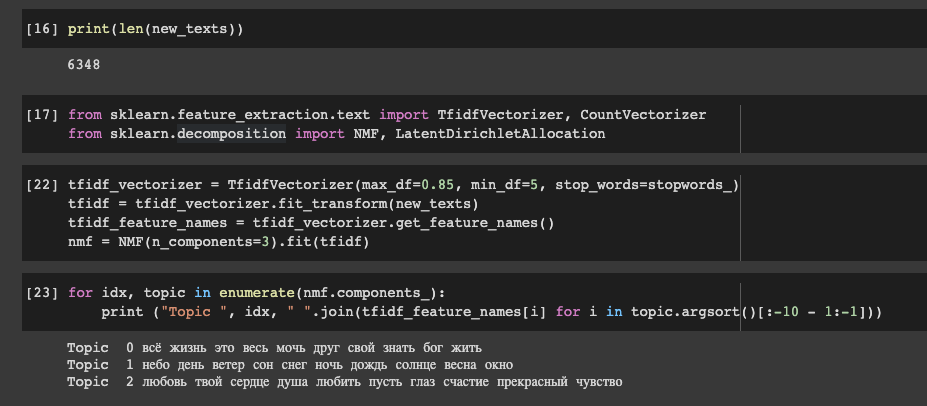

### Четырехстопный ямб:

Topic 0 всё жизнь весь свой день душа это лишь мир мочь

Topic 1 любовь сердце душа любить чувство вновь пусть счастие жизнь её

Topic 2 твой любить глаз хотеть рука взгляд слово губа простить знать

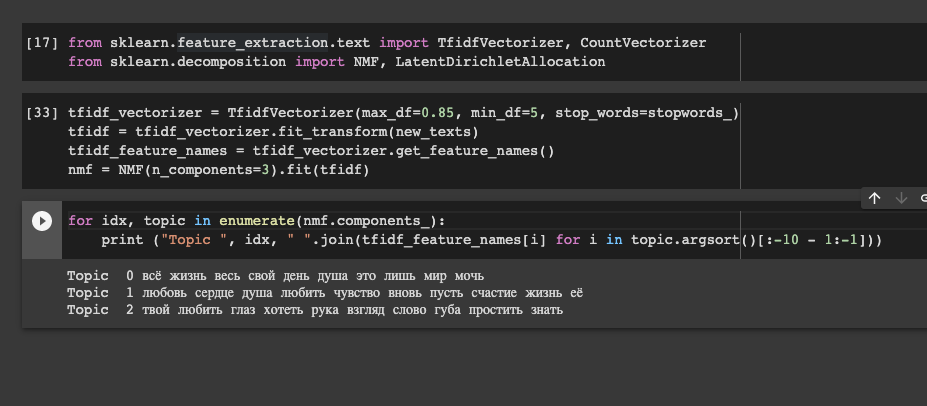

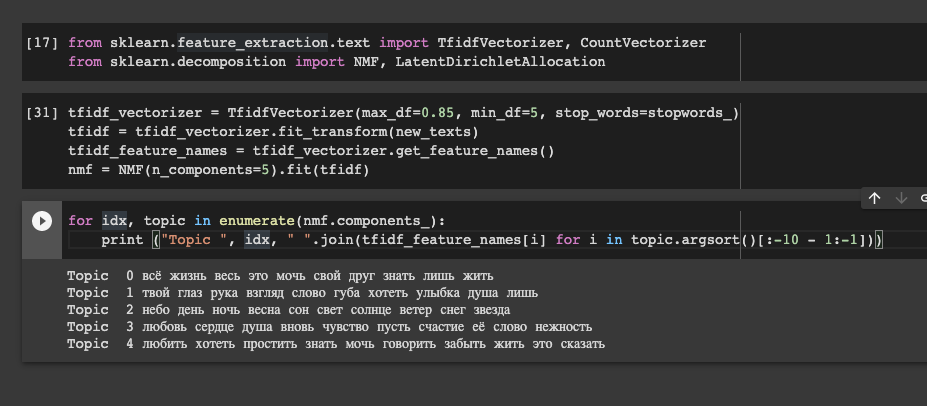

### Четырехстопный хорей:

Topic 0 всё это мочь весь знать жизнь год жить друг очень

Topic 1 небо ветер солнце снег осень ночь лето дождь весна белый

Topic 2 твой любовь сердце душа любить мир счастие глаз боль жизнь

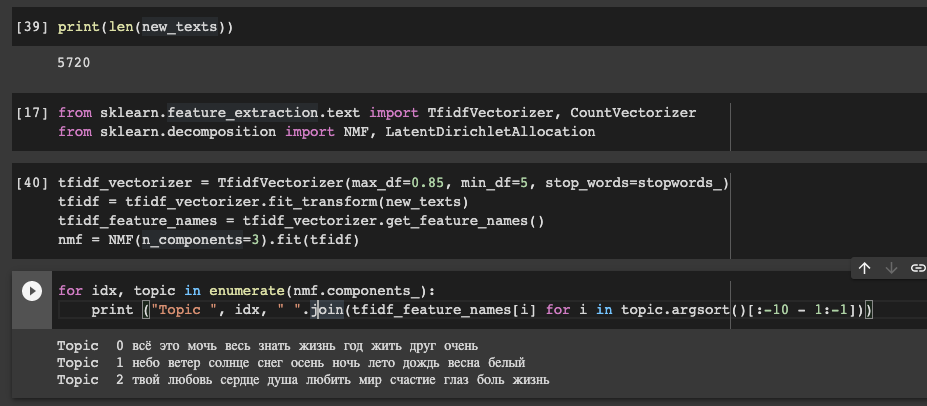

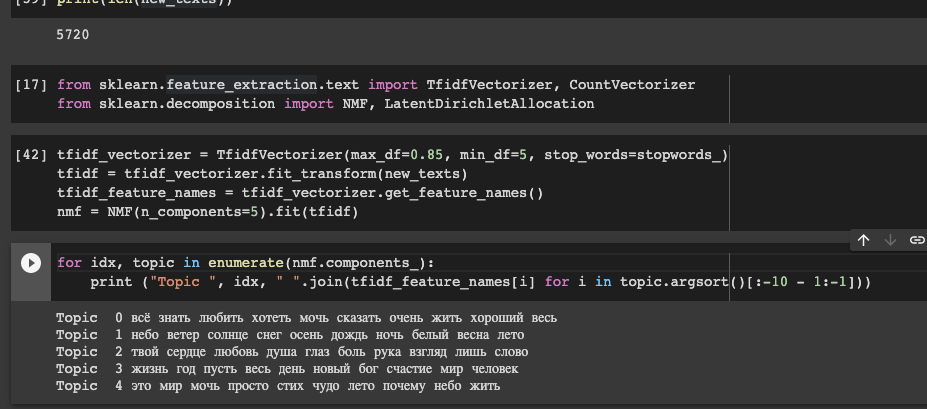

### Трехстопный анапест:

Topic 0 всё жизнь это мочь друг свой весь знать жить мир

Topic 1 небо ветер осень солнце дождь снег белый день земля свет

Topic 2 твой любовь любить хотеть сердце глаз душа губа пусть лишь

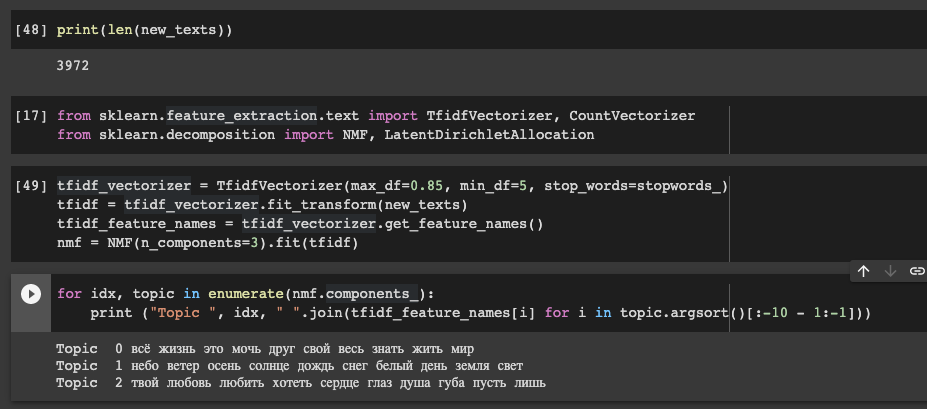

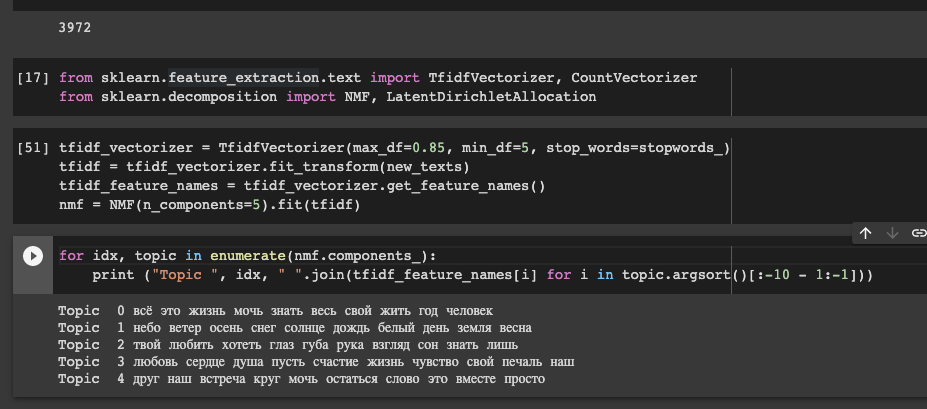